In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt



In [ ]:
df = yf.download('AAPL', start = '2020-01-01', end = '2024-01-01')

df['previous_close'] = df['Close'].shift(1)
df['lagVol1'] = df['Volume'].shift(1)
df.columns = [c[0] for c in df.columns]
df['range'] = (df['High'] - df['Low']) / df['Open']
df['ma10'] = df['Open'].rolling(10).mean()
df['ma5'] = df['Open'].rolling(5).mean()
df['returns'] = df['Open'].pct_change()
df['DayOfTheWeek'] = df.index.day_of_week
df['Month'] = df.index.month
df['volume_pct_change'] = df['Volume'].pct_change()
df["VolMA5"]    = df["Volume"].shift(1).rolling(5).mean()
df["VolMA20"]   = df["Volume"].shift(1).rolling(20).mean()
df["VolStd20"]  = df["Volume"].shift(1).rolling(20).std()

df['Ret1Lag1'] = df['Close'].pct_change().shift(1)
df['lag1_volume_pct_change'] = df['volume_pct_change'].shift(1)
df['lag2_volume_pct_change'] = df['volume_pct_change'].shift(2)
df['lag3_volume_pct_change'] = df['volume_pct_change'].shift(3)
df['lag4_volume_pct_change'] = df['volume_pct_change'].shift(4)
df['lag5_volume_pct_change'] = df['volume_pct_change'].shift(5)
df["VolZ20"]    = (df["lag1_volume_pct_change"] - df["VolMA20"]) / df["VolStd20"]

df["GapPctLag1"] = (df['Open'] - df['Close']) / df['Close']
df["IsMonthEnd"]    = df.index.is_month_end.astype(int)
df["IsQuarterEnd"]  = df.index.is_quarter_end.astype(int)
df = df.fillna(0)

features = ['Close', 'High', 'Low', 'Open', 'previous_close', 'lagVol1',
       'range', 'ma10', 'ma5', 'returns', 'DayOfTheWeek', 'Month',
        'VolMA5', 'VolMA20', 'VolStd20', 'Ret1Lag1',
       'lag1_volume_pct_change', 'lag2_volume_pct_change',
       'lag3_volume_pct_change', 'lag4_volume_pct_change',
       'lag5_volume_pct_change', 'VolZ20', 'GapPctLag1', 'IsMonthEnd',
       'IsQuarterEnd']

X = df.loc[:,features]
y = df.loc[X.index, 'volume_pct_change']

C:\Users\fgili\AppData\Local\Temp\ipykernel_5736\2467307760.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start = '2020-01-01', end = '2024-01-01')
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,previous_close,lagVol1,range,ma10,ma5,returns,DayOfTheWeek,Month,VolMA5,VolMA20,VolStd20,Ret1Lag1,lag1_volume_pct_change,lag2_volume_pct_change,lag3_volume_pct_change,lag4_volume_pct_change,lag5_volume_pct_change,VolZ20,GapPctLag1,IsMonthEnd,IsQuarterEnd
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,0.000000,0.0,0.018262,0.000000,0.000000,0.000000,3,1,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.013684,0,0
2020-01-03,71.763702,72.523731,71.539314,71.696144,72.468262,135480400.0,0.013730,0.000000,0.000000,0.003072,4,1,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000941,0,0
2020-01-06,72.335564,72.374169,70.634547,70.885479,71.763702,146322800.0,0.024541,0.000000,0.000000,-0.011307,0,1,0.0,0.0,0.000000e+00,-0.009722,0.080029,0.000000,0.000000,0.000000,0.000000,0.000000,-0.020047,0,0
2020-01-07,71.995354,72.600960,71.775789,72.345204,72.335564,118387200.0,0.011406,0.000000,0.000000,0.020593,1,1,0.0,0.0,0.000000e+00,0.007969,-0.190918,0.080029,0.000000,0.000000,0.000000,0.000000,0.004859,0,0
2020-01-08,73.153511,73.455110,71.698596,71.698596,71.995354,108872000.0,0.024499,0.000000,71.620405,-0.008938,2,1,0.0,0.0,0.000000e+00,-0.004703,-0.080374,-0.190918,0.080029,0.000000,0.000000,0.000000,-0.019889,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,191.788757,193.581821,191.164647,193.353962,192.858658,46482500.0,0.012501,193.894865,194.251499,-0.004692,4,12,64745940.0,53356375.0,2.088764e+07,-0.000770,-0.110260,0.283162,-0.269727,-0.566263,0.923318,-2.554448,0.008161,0,0
2023-12-26,191.243881,192.076019,191.025938,191.798640,191.788757,37149600.0,0.005475,193.944395,193.760139,-0.008044,1,12,46468180.0,54011440.0,2.011112e+07,-0.005548,-0.200783,-0.110260,0.283162,-0.269727,-0.566263,-2.685650,0.002901,0,0
2023-12-27,191.342987,191.689719,189.302262,190.689173,191.243881,28919300.0,0.012520,193.885951,193.033010,-0.005785,2,12,41101660.0,53429775.0,2.068103e+07,-0.002841,-0.221545,-0.200783,-0.110260,0.283162,-0.269727,-2.583516,-0.003417,0,0


In [39]:
X.isna().sum()


Close                     0
High                      0
Low                       0
Open                      0
previous_close            0
lagVol1                   0
range                     0
ma10                      0
ma5                       0
returns                   0
DayOfTheWeek              0
Month                     0
VolMA5                    0
VolMA20                   0
VolStd20                  0
Ret1Lag1                  0
lag1_volume_pct_change    0
lag2_volume_pct_change    0
lag3_volume_pct_change    0
lag4_volume_pct_change    0
lag5_volume_pct_change    0
VolZ20                    0
GapPctLag1                0
IsMonthEnd                0
IsQuarterEnd              0
dtype: int64

(-15.982983249682956, 6.802829441498427e-29, 6, 999, {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}, 324.1929859516565)


<Axes: xlabel='Date'>

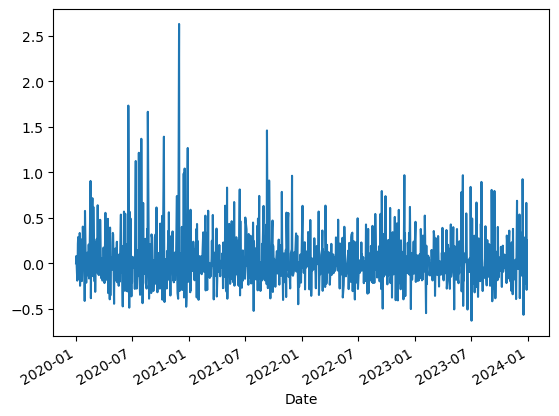

In [41]:
from statsmodels.tsa.stattools import adfuller

print(adfuller(y))
y.plot()

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,VIF
0,Close,84564.517347
1,High,109021.821014
2,Low,93605.431883
3,Open,90312.788033
4,previous_close,4461.102424
5,lagVol1,78.512032
6,range,53.548217
7,ma10,715.444615
8,ma5,2102.200166
9,returns,1.881380


In [49]:
# redifine features


features = ['previous_close', 'lagVol1',
       'range', 'returns', 'DayOfTheWeek', 'Month', 'VolStd20', 'Ret1Lag1',
       'lag1_volume_pct_change', 'lag2_volume_pct_change',
       'lag3_volume_pct_change', 'lag4_volume_pct_change',
       'lag5_volume_pct_change', 'VolZ20', 'GapPctLag1', 'IsMonthEnd',
       'IsQuarterEnd']

X = df.loc[:,features]
y = df.loc[X.index, 'volume_pct_change']

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,features,VIF
0,previous_close,14.407443
1,lagVol1,17.818324
2,range,6.615545
3,returns,1.486941
4,DayOfTheWeek,3.061306
5,Month,5.423654
6,VolStd20,10.849158
7,Ret1Lag1,1.525302
8,lag1_volume_pct_change,1.822977
9,lag2_volume_pct_change,1.671981


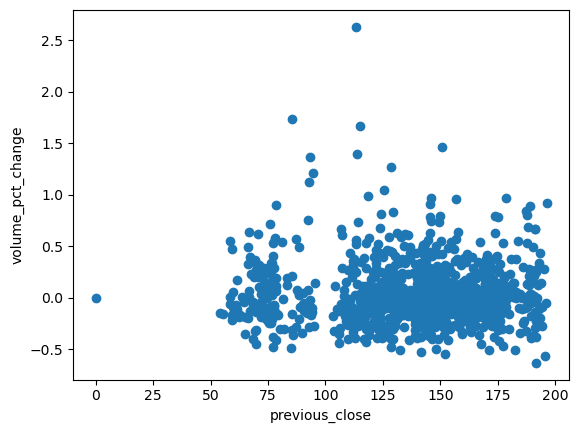

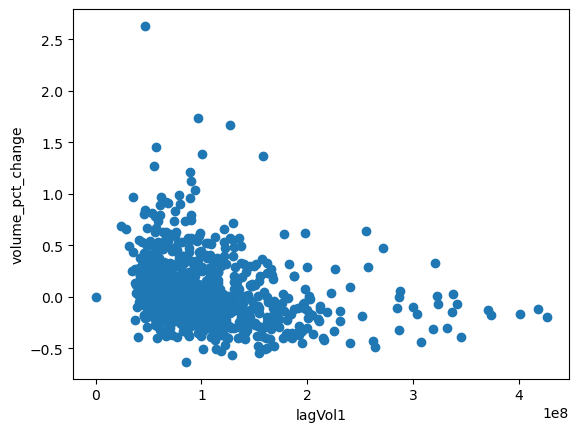

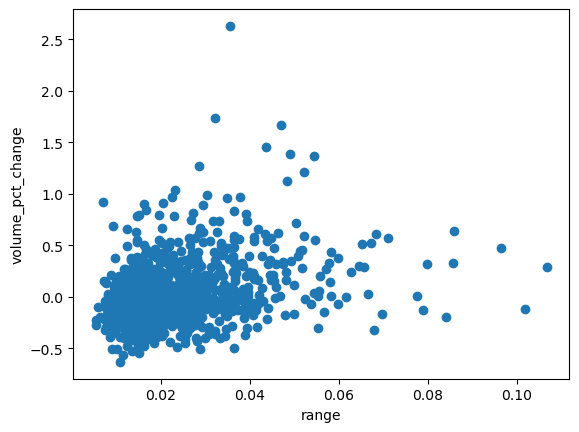

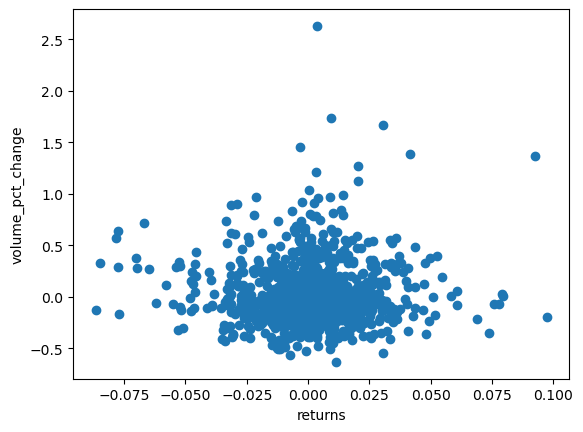

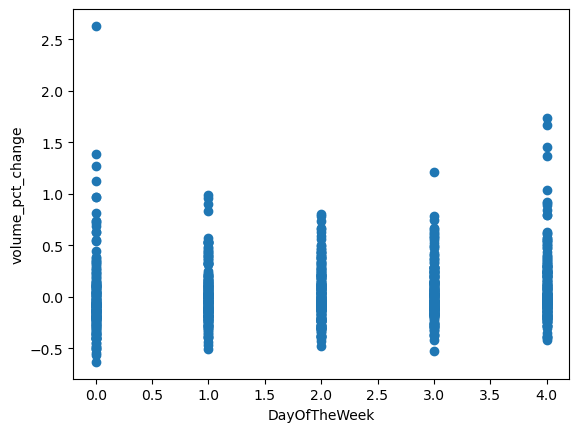

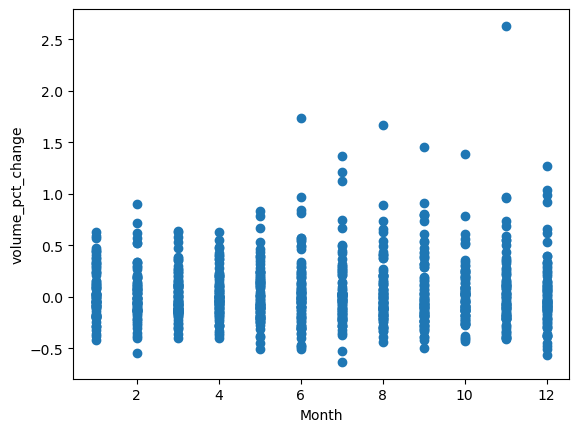

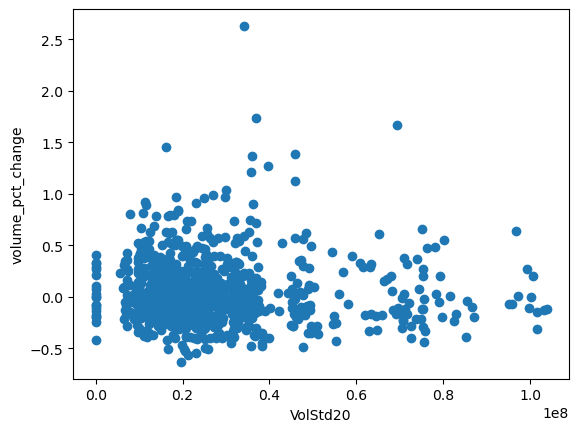

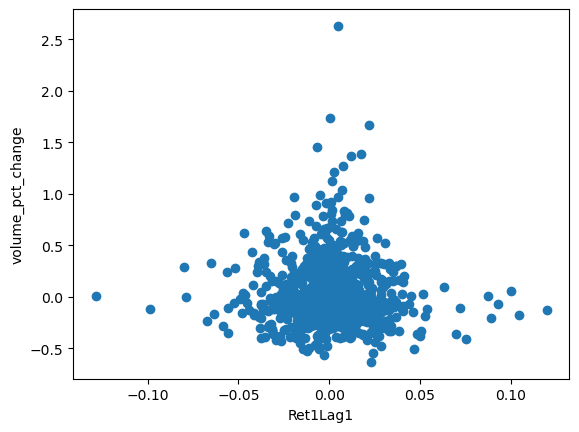

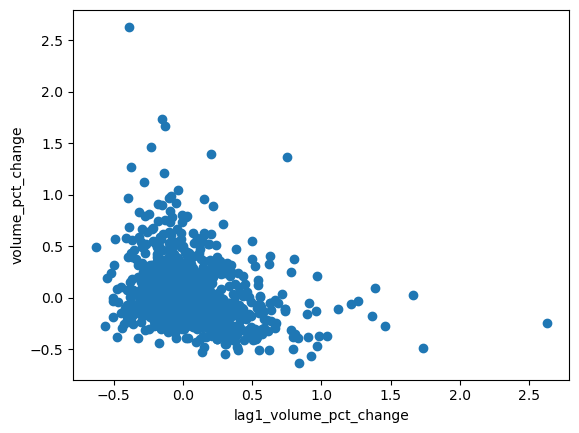

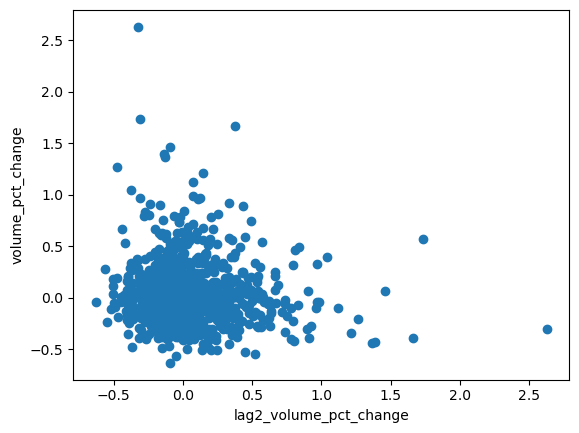

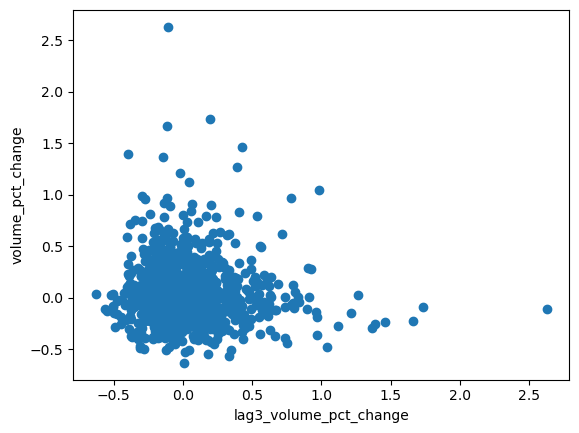

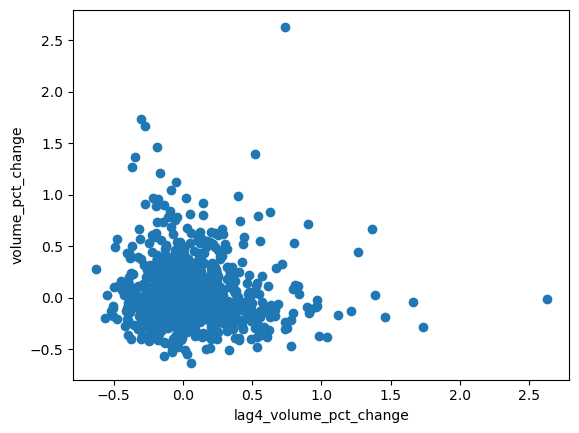

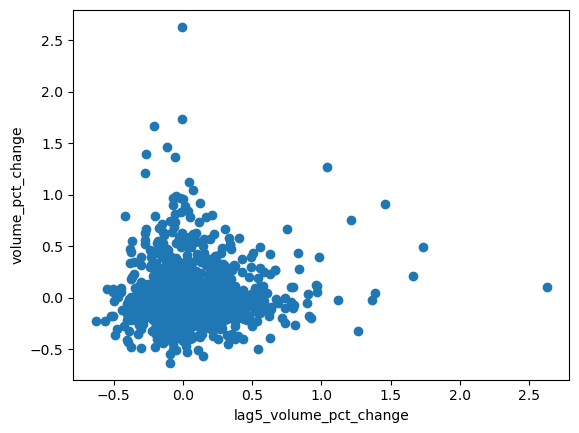

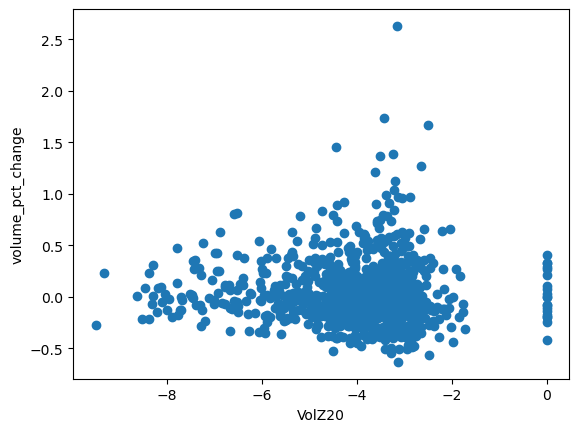

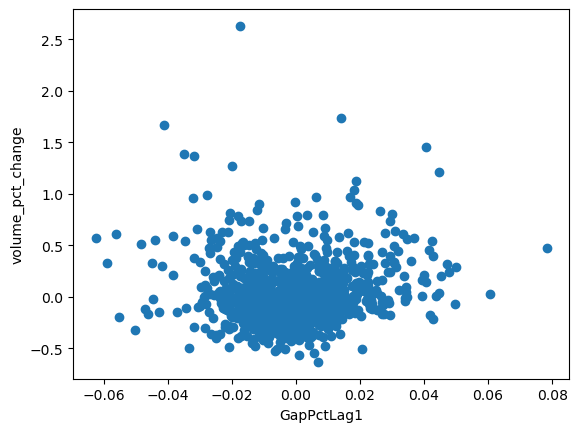

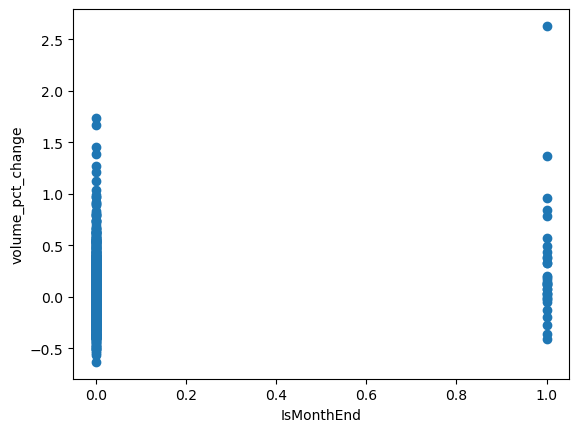

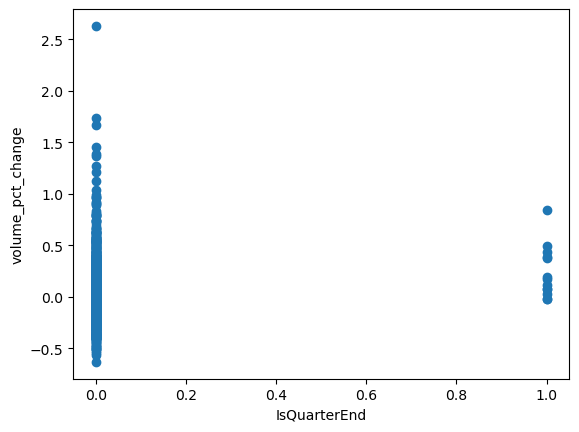

In [50]:
for c in X.columns:
    plt.scatter( X[c], y)
    plt.xlabel(c)
    plt.ylabel('volume_pct_change')
    plt.show()

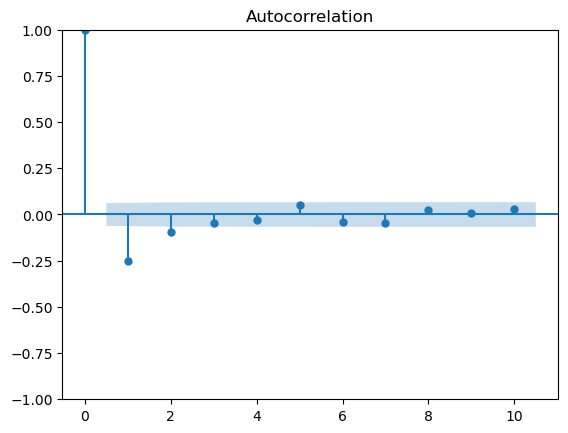

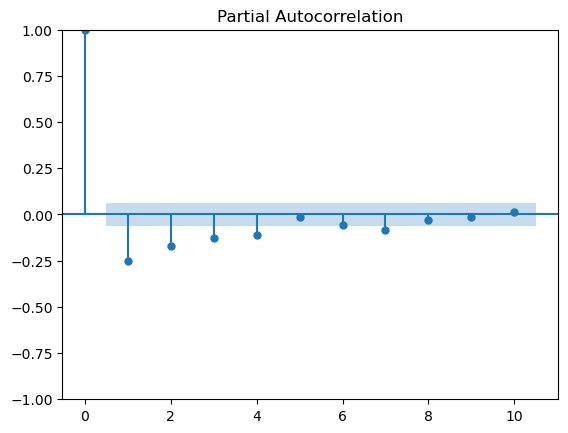

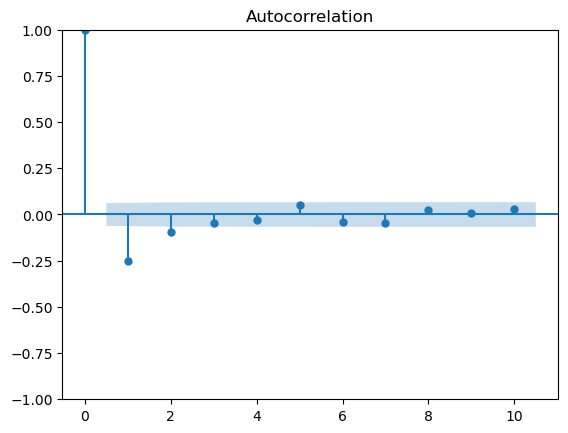

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df['volume_pct_change'], lags = 10)
plot_acf(df['volume_pct_change'], lags = 10)

c:\Users\fgili\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 17, but rank is 15
  warnings.warn('covariance of constraints does not have full '


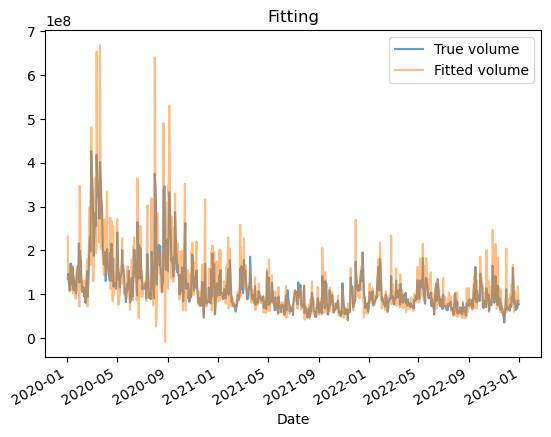

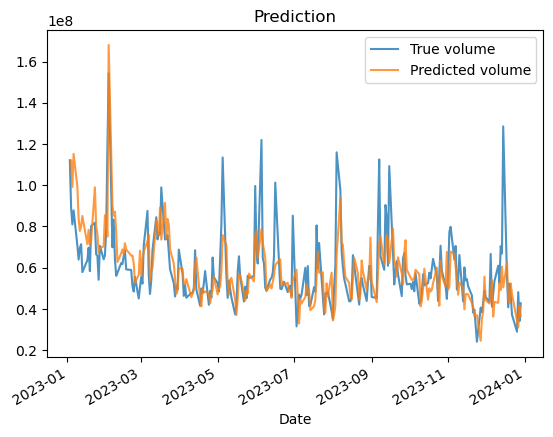

In [70]:
date_split = '2023-01-01'
X_train = X[:date_split]
X_test = X[date_split:]
y_train = y[:date_split]
y_test = y[date_split:]

model = regression.linear_model.OLS(y_train,sm.add_constant(X_train)).fit(cov_type="HC3")
model.summary()


r_fitted = model.predict(sm.add_constant(X_train))
vol_prev = df.loc[X_train.index, 'Volume']
vol_fitted = vol_prev * (1 + r_fitted)
vol_true_fitted = df.loc[X_train.index, 'Volume']

vol_true_fitted.plot(label= 'True volume', alpha = 0.7)
vol_fitted.plot(label = 'Fitted volume', alpha = 0.5)
plt.legend()
plt.title('Fitting')
plt.show()

r_hat = model.predict(sm.add_constant(X_test))

vol_prev = df.loc[X_test.index,'Volume'].shift(1)
vol_pred = vol_prev*(1+r_hat)

vol_true = df.loc[X_test.index,'Volume']


vol_true.plot(label = 'True volume', alpha = 0.8)
vol_pred.plot(label = 'Predicted volume', alpha = 0.8)
plt.legend()
plt.title('Prediction')
plt.show()




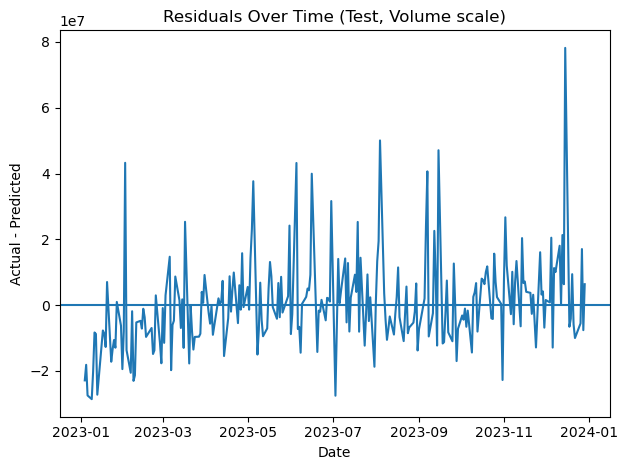

(-14.69024782971993, 3.0575235044619348e-27, 0, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, 8284.75657475728)


In [71]:
resid_test = vol_true - vol_pred

plt.plot(resid_test.index, resid_test.values)
plt.title('Residuals Over Time (Test, Volume scale)')
plt.axhline(0.0)
plt.xlabel('Date'); plt.ylabel('Actual - Predicted')
plt.tight_layout(); plt.show()

print(adfuller(resid_test.dropna()))

<Axes: xlabel='Volume'>

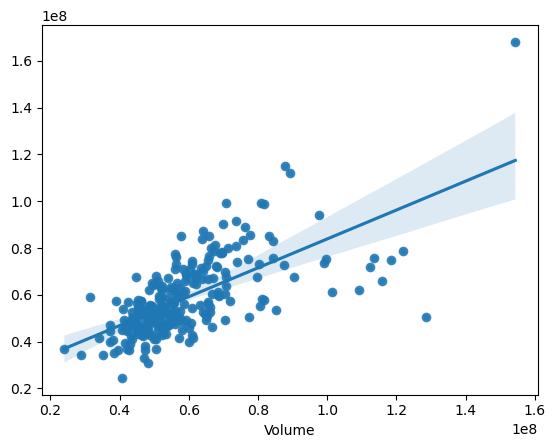

In [72]:
import seaborn as sns
plt.scatter(vol_true.values, vol_pred.values, s=12, alpha=0.7)
sns.regplot(x=vol_true, y=vol_pred)


In [73]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

print(het_breuschpagan(model.resid, model.model.exog)) # check homoskedasticity, small p reject
print(durbin_watson(model.resid)) # check autocorrelation < 2 pos autocorr, ~2 top, > 2 neg autocorr


(78.67282173449831, 6.592788278630835e-10, 5.042357867038247, 1.7516955706005452e-10)
1.832996864706551


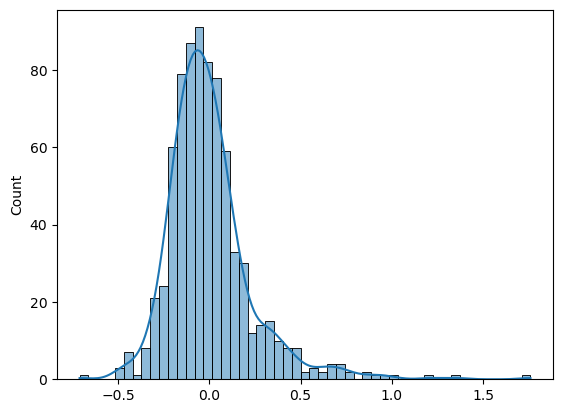

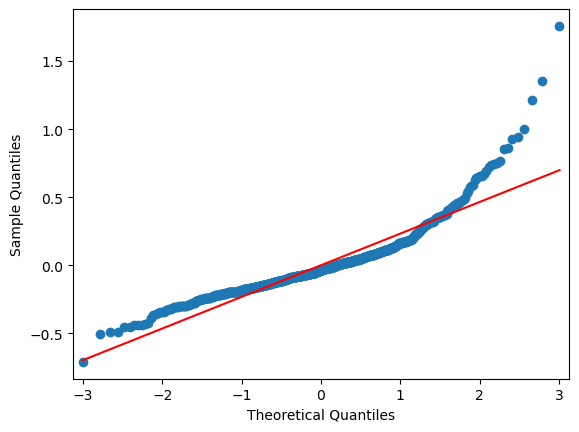

(2544.4299149090893, 0.0, 1.9241911858567158, 11.12191516671666)


In [74]:
sns.histplot(model.resid, kde = True)
plt.show()
sm.qqplot(model.resid, line = 's')
plt.show()

from statsmodels.stats.stattools import jarque_bera
print(jarque_bera(model.resid)) # check normality, small p I reject normality
# .fit(cov_type="HC3")